# visualize some geo data
_made by alex_

**tools:** geopandas, plotly

**data:** [NYC Open Data](https://data.cityofnewyork.us/), kaggle, [_nyc base map_](https://github.com/codeforgermany/click_that_hood/blob/main/public/data/new-york-city-boroughs.geojson)

-  [Sidewalk Café Regulations GIS: Shapefile](https://data.cityofnewyork.us/City-Government/Sidewalk-Caf-Regulations-GIS-Shapefile/qsuf-mgjh)
-  [FDNY Firehouse ListingPublic](https://data.cityofnewyork.us/Public-Safety/FDNY-Firehouse-Listing/hc8x-tcnd)
-  [Park Zones Map](https://data.cityofnewyork.us/City-Government/Parks-Zones-Map/ab4a-qhzt)
-  [2020 neighborhood zoning](https://data.cityofnewyork.us/City-Government/2020-Neighborhood-Tabulation-Areas-NTAs-Mapped/4hft-v355)
-  [Bicycle Parking](https://data.cityofnewyork.us/Transportation/Bicycle-Parking/yh4a-g3fj)
-  [Park Zones](https://data.cityofnewyork.us/City-Government/Parks-Zones-Map/ab4a-qhzt)
-  [Registered Sidewalk Cafes](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-sidewalk.page)


### Using NYC Open Data's MapPLUTO

In [98]:
import pandas as pd
import json
import math
import plotly.express as px
import numpy as np
from sklearn import neighbors

In [97]:
with open('./data/base-maps/pluto.geojson', 'r') as f:
    nycmap_pluto = json.load(f)

In [106]:
# import lighter pluto csv for datas
df = pd.read_csv("./data/base-maps/pluto_22v2.csv", usecols=['bbl','borough','numbldgs','firecomp','policeprct','yearbuilt','zipcode','latitude','longitude'])

In [109]:
#df1 = pd.read_csv("2020_Neighborhood_Tabulation_Areas__NTAs__-_Tabular.csv")

In [108]:
# IMPORT COFFEE SHOP DATA YOU WHORE
# df1 = pd.read_json()


Begin Manipulating data sets

In [ ]:
# 
libs['latitude'] = libs['latitude'].apply(func=math.radians)
libs['longitude'] = libs['longitude'].apply(func=math.radians)
libs['coord'] = list(zip(libs['latitude'], libs['longitude']))

Geographic center of nyc = (40.697104, -73.979538)

In [116]:
fig = px.choropleth_mapbox(df,
                           geojson=nycmap_pluto,
                           locations="bbl",
                           color="yearbuilt",
                           mapbox_style="carto-positron",
                           zoom=0, center={"lat": 40.7, "lon":-74.},
                           hover_name="yearbuilt"
                          )

In [117]:
fig.show()

...

In [ ]:
# load library data from csv file, convert coordinates to radians, and create coordinate pairs
libs = pd.read_csv('manhattanlibraries.csv', usecols=['facname', 'latitude', 'longitude'])
libs['latitude'] = libs['latitude'].apply(func=math.radians)
libs['longitude'] = libs['longitude'].apply(func=math.radians)
libs['coord'] = list(zip(libs['latitude'], libs['longitude']))

# load library data into BallTree
libcoords = np.asarray(list(libs['coord']))
tree = neighbors.BallTree(libcoords, metric="haversine")

# load lot data from csv file, convert coordinates to radians, and create coordinate pairs
df = pd.read_csv('pluto_small.csv')
df = df.dropna(subset=['assesstot', 'bldgarea', 'lotarea', 'latitude', 'longitude'])
df['latitude'] = df['latitude'].apply(func=math.radians)
df['longitude'] = df['longitude'].apply(func=math.radians)
df['coord'] = list(zip(df['latitude'], df['longitude']))

# query the BallTree and save results back in df
lotcoords = np.asarray(list(df['coord']))
dist, _ = tree.query(X=lotcoords, k=1)
df['dist'] = dist
df['dist'] = df['dist'].apply(lambda x: x*3960)


In [ ]:
# use Plotly express function to create a choropleth map
fig = px.choropleth_mapbox(df,
                           geojson=nycmap,
                           locations="bbl",
                           featureidkey="properties.bbl",
                           color="dist",
                           color_continuous_scale=px.colors.sequential.thermal[::-1],
                           range_color=(0, 0.5),
                           mapbox_style="carto-positron",
                           zoom=9, center={"lat": 40.7, "lon": -73.7},
                           opacity=0.7,
                           hover_name="ownername"
                           )

fig.show()

In [92]:
import json
import geopy
import pandas as pd
import geopandas as gpd
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [93]:
PARKS_ZONES = "./data/Parks_Zones.csv"
FDNY_FIREHOUSE_LISTING = "./data/FDNY_Firehouse_Listing.csv"
NEIGHBORHOOD_TABULATION_AREAS = "./data/2020_Neighborhood_Tabulation_Areas__NTAs__-_Tabular.csv"

SIDEWALKCAFE = "./data/sidewalkcafe.geojson"
SIDEWALK__REGULATIONS_GIS__SHAPEFILE = "./data/Sidewalk__Regulations_GIS__Shapefile.geojson"
#NEIGHBORHOOD_NAMES_GIS = "./data/Neighborhood_Names_GIS.geojson"
BICYCLE_PARKING = "./data/Bicycle_Parking.geojson"

PLOTLY_COUNTIES = "./data/geojson-counties-fips.json"
NYC_BOROUGHS = "./data/nyc_boroughs/geo_export_d082ab44-4688-42c8-8fe8-2d5f5abe25d9.shp"

In [47]:
with open(PLOTLY_COUNTIES, 'r') as file:
    nyc_base = json.load(file)

nycarea = gpd.read_file(NYC_BOROUGHS).to_json()

In [50]:
#px.choropleth(geojson=nycarea)

In [88]:
#gf_bike = gpd.read_file(BICYCLE_PARKING)
#print( gf_bike.info() )
#px.map

#areas = gpd.read_file(NEIGHBORHOOD_TABULATION_AREAS) #, dtype={'Shape_Leng':float})
#areas.info()
#px.choropleth(areas, geojson="geometry", )
#areaz = pd.read_csv(NEIGHBORHOOD_TABULATION_AREAS, dtype={'the_geom':str})
#areaz.info()
#areas.head()
#areas.to_crs(
#px.choropleth(areas, geojson=nyc_base)






#gdf = gpd.read_file(NEIGHBORHOOD_TABULATION_AREAS)

nyc_map_dtypes = {
    'the_geom':    object,
    'BoroName':    object,
    'NTAName':     object,
    'NTAAbbrev':   object,
    'Shape_Leng':  'float64',
    'Shape_Area':  'float64',
}
nyc_map_include_cols = list(nyc_map_dtypes.keys())

df = pd.read_csv(NEIGHBORHOOD_TABULATION_AREAS, usecols=nyc_map_include_cols, dtype=nyc_map_dtypes)
df.head()

geo_df = 


geo_df = gpd.GeoDataFrame.from_
#gdf.geometry = gpd.GeoSeries.from_wkt(gdf['the_geom'])
gdf.info()
gdf.set_index(gdf['NTAName'])
gdf.plot()

df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")
gpd.read_file(NEIGHBORHOOD_TABULATION_AREAS)

fig = px.choropleth(areas,
                   geojson=areas.geometry
                   )
#fig.update_geos(fitbounds="locations", visible=False)
fig.show()


,the_geom,BoroName,NTAName,NTAAbbrev,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.93213397515774 40.72815960...,Brooklyn,Greenpoint,Grnpt,28914.355951,3.532200e+07
1,MULTIPOLYGON (((-73.95814292507116 40.72440428...,Brooklyn,Williamsburg,Wllmsbrg,28155.614512,2.886227e+07
2,MULTIPOLYGON (((-73.95023693757913 40.70547324...,Brooklyn,South Williamsburg,SWllmsbrg,18252.346181,1.520934e+07
3,MULTIPOLYGON (((-73.92405909736993 40.71411156...,Brooklyn,East Williamsburg,EWllmsbrg,43184.868945,5.226612e+07
4,MULTIPOLYGON (((-73.99236367043248 40.68969012...,Brooklyn,Brooklyn Heights,BkHts,14337.876099,9.985373e+06


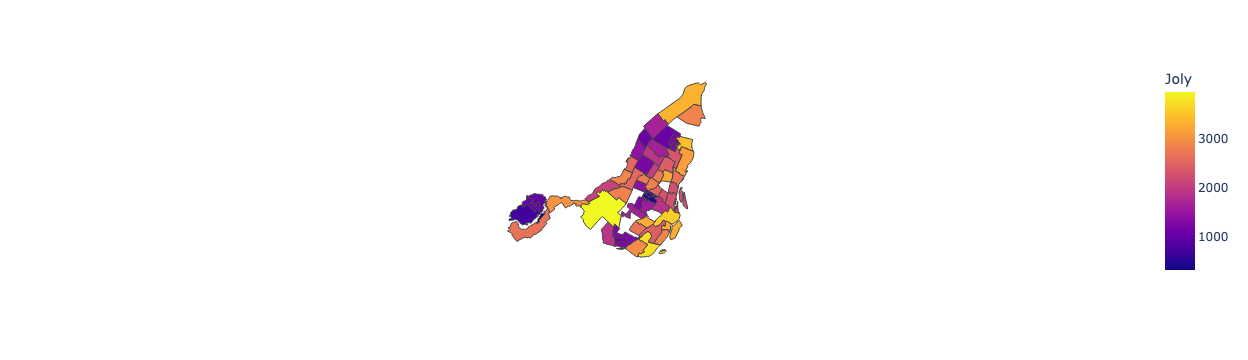

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 57 entries, 11-Sault-au-Récollet to 194-Parc-Extension
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geometry     57 non-null     geometry
 1   Coderre      57 non-null     int64   
 2   Bergeron     57 non-null     int64   
 3   Joly         57 non-null     int64   
 4   total        57 non-null     int64   
 5   winner       57 non-null     object  
 6   result       57 non-null     object  
 7   district_id  57 non-null     int64   
dtypes: geometry(1), int64(5), object(2)
memory usage: 6.1+ KB


In [85]:

import plotly.express as px
import geopandas as gpd

df = px.data.election()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")


fig = px.choropleth(geo_df,
                   geojson=geo_df.geometry,
                   locations=geo_df.index,
                   color="Joly",
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
geo_df.head()
geo_df.info()

In [63]:
px.data.election[0:5]
px.data.election_geojson()[0:5]

df = px.data.election()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")

fig = px.choropleth(geo_df,
                   geojson=geo_df.geometry,
                   locations=geo_df.index,
                   color="Joly",
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

dict